In [27]:
import tensorflow as tf
import numpy as np
import glob
import os
import h5py
import matplotlib.pyplot as plt
from functools import reduce
from itertools import combinations
from PIL import Image
%matplotlib inline

In [42]:
angles = { 'front': '1', 'top': '2', 'side': '3' }
channels = ['depth', 'rgb', 'synthdepth']
types = ['train', 'test']

dataset_dir = '/raided/datasets/nyu/dataset'
datasets = dict([((type, channel, angles[angle]), \
                  sorted(glob.glob(os.path.join(dataset_dir, type, 'png', '%s_%s_*.png' % (channel, angles[angle]))))) \
                                   for angle in angles for channel in channels for type in types])

In [54]:
def to_dataset(hdf5, attributes, filenames):
    type, channel, angle = attributes
    
    if(channel == 'depth'):
        dtype = 'uint32'
        channels = 1
    else:
        dtype = 'uint8'
        channels = 3
        
    dataset = hdf5.create_dataset('%s_%s_%s' % attributes, (len(filenames), 480, 640, channels), dtype=dtype)
    
    for i in range(len(filenames)):
        with Image.open(filenames[i]) as raw_image:
            image = np.asarray(raw_image, np.uint8)
        
        if(channel == 'depth'):
            image = np.asarray(image, np.uint32)
            image = np.expand_dims(reduce(lambda x, y: (x << 8) + y, image.T).T, 2)
        
        dataset[i, :, :, :] = image
    
    return dataset

In [79]:
with h5py.File('/raided/datasets/nyu/dataset/hdf5/nyu.hdf5', 'w') as file:
    for dataset, filenames in datasets.items():
        to_dataset(file, dataset, filenames)

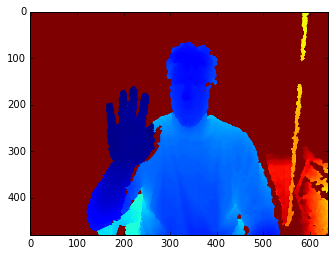

In [78]:
with h5py.File('/raided/datasets/nyu/dataset/hdf5/nyu.hdf5', 'r') as file:
    plt.imshow(file['test_depth_1'][0, :, :, 0])